In [1]:
import PyPDF2
import matplotlib.pyplot as plt
%matplotlib inline

# Reading a PDF File

In [2]:
pageObj =  open('JavaBasics-notes.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pageObj)


In [3]:
# Extracting each page text 
pageText = []

for i in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(i)          
    pageText.append(pageObj.extractText())
    

In [4]:
# Combining every page text into single page
pageText = " ".join(pageText)


# Applying NLP

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

WNL = WordNetLemmatizer()


In [6]:
# Creating a set of stopwords and punctuations

customStopWords = set(stopwords.words('english') + list(punctuation))


In [7]:
# Lemmatizing each word (Closed , Closer, Closely => Close)

lemmatize_words = [WNL.lemmatize(word) for word in word_tokenize(pageText)]


In [8]:
# Removing stopwords and punctuations and creating a list of clean lemmatized words 
clean_words = [word.lower() for word in lemmatize_words  if (word.lower().isalpha() and word.lower() not in customStopWords)]


# Most Frequent Words

In [46]:
from collections import Counter

# n_top is the number of most frequent words we want
def top_words(words, n_top=5):
    return(Counter(words).most_common(n_top))



In [47]:
top_words(clean_words, 10)

[('java', 86),
 ('new', 47),
 ('data', 42),
 ('object', 37),
 ('button', 36),
 ('applet', 35),
 ('array', 30),
 ('int', 29),
 ('class', 28),
 ('code', 27)]

#  Check if a word is present in a document or not with it's frequency

In [11]:
# Word to check is anything originally present in the document without any modifications.

def check_word(word_to_check, document):
    
    words = word_tokenize(document)
    
    if word_to_check in words:
        print("The word '{}' is present with frequency of {}.".format(word_to_check, Counter(words)[word_to_check]))
    else:
        print("Sorry, the word '{}' is not present in the document..".format(word_to_check))
        

In [112]:
check_word('object', pageText)

check_word('objects', pageText)


The word 'object' is present with frequency of 18.
The word 'objects' is present with frequency of 17.


# Plotting the graph of most frequent words

In [13]:
import pandas as pd

In [53]:
word_counter = Counter(clean_words)
Word = list(word_counter.keys())
Count = list(word_counter.values())

In [62]:
df = pd.DataFrame({"Word":Word, "Count":Count})

In [63]:
df.head(5)

,Word,Count
0,java,86
1,rights,23
2,basics,23
3,basicstopics,1
4,section,3


In [101]:
def plot_graph(top_n_words=5):
    sortedCount = pd.DataFrame.sort_values(df,['Count'],ascending=[0])[:top_n_words]
    sortedCount.plot(kind='barh',x='Word',y='Count')


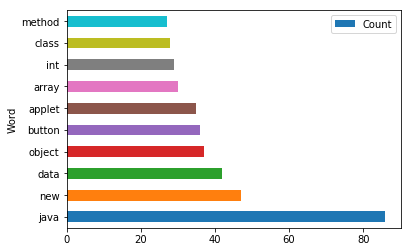

In [103]:
plot_graph(10)